<a href="https://colab.research.google.com/github/Jodyyy1/blank-app/blob/main/Detect_LLM_Generated_Essays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'llm-detect-ai-generated-text:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F61542%2F7516023%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240725%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240725T070258Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D308720224f5634a4a06bc2b489679242fc876209b20232761cf4243fc1d27bc9b657fa4568cf5cd69e680fa312c6e9ca4d47ce4f6256c654e33ac821dc4f659c56821e2f6acd521721f947d30f1acda9ca7494ba3be694ad8e153a9d6c7ee50a6b1daa74d4cd4c6ba56a66e4efe6bd6aaf95cb429c9e03418d032397140c6aa4d259c29b2cc54b1d8041a4d73a17452b712b83da5a2aa7014301076c96dc5762d6be0b4922d7f6554bf8ff55fd4f2db63e997f40a7bf3bcec65189aa0a768e2b6af79db191379fb91c250c2622c43f9da9069343dbf1c95c792c1ee4cd1e56ccfc82aa6203c9967f5c74ba54cc7d6806861ff74f89e925c9497afd2aa13198f5,daigt-external-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3936750%2F6847931%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240725%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240725T070258Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8e18530044d1f8a59a967333f8170af1d078af39b8cea1ed0d8b0198036e508bb5f835e0b943324b53ea44ac9cca73eb9982d345cc182d96467c958350a8b70b1ebc9d8985eb77c3689faa206d83b5e181981e57625e1bc38bb658954c0c368f83e8dc6e0db15504184ffe28ebd21ddaa6937ff42e89692c787bcf5bd5db0ee32569d5a5ec5f51dab26b7d19ef5f2d13d6db015adf27eb3fa276494f71bf9f34d7b31c322d128627d11e17059e1591a2a630d2163f7d355a0b863b01020a54c469cb036224fa402b3c6b2eecb79b54c4860617c8456ba4740de96f00f01673f01d64cf589cfced997658b530b13782b5b8fbcf8c61e5df40b9cb21d7d039df88,argugpt:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3946973%2F6867914%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240725%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240725T070258Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9f46791f686702bf303a43e108ece69cf9c673d26db44e7d4b1bd42fab3a2649519f0cff699a15044b14b0bf4b989973f19dc6261d21ca948edf17476e69cb9651e5cdfaeccd0aae012814d93ac4e41b25106756b7449e5830d4779c8e616fa4aaa3781dc58aa3fb211a447454ef7ba45aa1aa4709ebfb66664837f0ec0f035f6dd9db7034652fdcbb84b0988890486cdaa5e15bec531db88917bd593e7c762c6e8aa92c875086e65f20d29dcbac22817e466e59a42f1ef91f4f18585c9c733345296dbadaed3caaed2ea44c636dca6e00ab24e0d8988c9fee8d4aedf15383a2ede49d46f9b813eb108a2075cde7b5431458d73fed5d578e4991f34b4dc2007e,llm-generated-essays:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3937441%2F6868189%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240725%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240725T070258Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D11807c5ca3af6c084f029a3ffdb904a66b9a8e03612946ce655c218272a45bbe2b7d6be628e90662365d0408c56c2de8742b21085d561879ee28a3055f53aa3c5c11f0afe9b0a5eb32d0a3ca60d294cf33f5872f4a87eaace29e1b4afd40b25f9da27f184321864fc7a72b5fbbdd79a3a44f28e0b2eaa8548c9d07d8c0f32501dee5e97566012168765128c38544aa0d15ff094a446a930535033f94efc857cb27ba25df0db0a98cb5c3fc7eebf0b1e97f31b2491db0f243a9eb0ffc4b366204098fd009a63c2141e22fbf3fb94c4972f46cd2e97b9af9264509094b6e15fb512f6870db291d8b87857e3fdcea8beed1a91eedf406a362d4a7c3c20b99c68484,hello-claude-1000-essays-from-anthropic:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3955358%2F6888403%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240725%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240725T070258Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Daea5165750f5d4c95e273590b1cb8e32717a819c2b34f2742b87493ed637769f9f742550423a8d626268c89f00356406a37d10d91301bd201a3fb3e9a545c8de764af7654bd477cac38b9f49739b6f95d985fac0d14375b2abcf5219454cb614036ebe11bdb6d8e36b733dd3a6af5bdc447f10a5fdaedb3ddd652fac2e111c49c416a47c26d52e23239daa59b2b8b4d43ae97d5b11769655658f27ee225e2a44bce02e8478b2dc0c5781409b2554ae4aab67c8507ce9b60b39c29aa6a25d85f996db5e88a38703034c43bf0ed02a080d55b65e610e69531bc743772e67b9cfe54ece391980dc3d118c70bac2669c8ee4ac5fbaa8e336efaba7e0faa9422df4b1,daigt-proper-train-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3942644%2F6890527%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240725%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240725T070258Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8bb660aeeef5334c2ca82e4b382c58a6897933d3aadb5d2295331923799c34c2aef5d627f9b00ad557f46acf7d1a6651223ca0ee60b4253b1c2f38c860bc1c73297eb8d9b9d346772d0fb2c3da1a6b714c4a3a042b64ae387533e5e1fb1d6a9d9ffef29b5c9ab939ba23bf6c5d3b8d2e65c488c4f82a0c62cec7f7c93357f50d7c53fe97c0a5f368c81bb4cb9107feb5fa9de52e918a71a92ee71d0faea2fb8db9c4940bf430b94db86492d0ab314e57449b774423ff10de78d85f079506737bb90d186c54efce799b18110a92532f1c41e7b3a12bf0a1418d597d08c56cf336bf6203558f11fc311a6df08b5e6f983b92bfeca9772ef958ed2e0bf10e4deb3a,llm-generated-essay-using-palm-from-google-gen-ai:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3973977%2F6920799%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240725%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240725T070258Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Db212b56ac989ee64bd38473a0f9735e3c33567dc6ef73ce5f903f371462d18f6a4753cf84e45095ef611551d8ac51b6f3f3b7c7a47d5abd6f02b2db084896c35ef4117073945c05e15fa31d4618be4c6649564ae04e40ca21ba3a9324a767ddbddd71750546e34a17ba18c98b56c9b78dea50786e5b736393bfbaac16408e06d5c0c19417c59372ff5eb7d64c62a6d354127defa0f83663bbad15b036e695446056b1abe73512bbdf4860aeb653598f3c838c4078cc0633497d53cf71fc6edbef33977f33c2c624fb68b5ff06ac22d11d7c525bf31d07ce86411e04e214da58c4fd9907dd2c63fd16aba42fdaf64abc99e7d7365264119e790d3ad9ba25d4295,llm-7-prompt-training-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3961875%2F6971638%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240725%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240725T070258Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D570725398b4f626ccd1340a986e81dc7012967a4d9f1ab9f06999329daf0a8ed40c7af8b047415d025a4ea61a681ced9bf887cddf7f54aa9974aa34888af1071049bc9fa92a39f19f2149ea8d359bcfb13a223e701ec0af471db909ea0412b5d89e2c3bc3f10603eb211840887dc07fb88fc74dffbd46f85fb7ef699f1b55d48a38f190af2c3b87c38e68af22ce587b4b39714db937f33ef9acb5d23dac245eeb1617ba99067d512dbc328d29bfb0641a62e6f566e4795ea61f741470ad681026939baf9dd4c8c70dc8f83d2aeaed8a8d2c4c814d5bd27e0644def41678b4e1f8c002bf87afd1fe07c77b69035fd17e485e6a723b328af8b43c5a607259089ed,daigt-v2-train-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4005256%2F6977472%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240725%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240725T070258Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dab32ad8272979b50ffb2072051bb3ca957937cfc0fe8350ff4d6a0c5886d321a603499a18e21af7ae83c436a7060a57f9b43d605dc529a8eb6e9beb3523ac74a66b3324b8d9b0d100db4f0c1d1c3a192ad5e74511fb3d49dfad7387469c43026ca9539f76fec84ba861bbc4e62338da41425ac736f3af7375f137a26fbeab878732f1add3b8a531e7915aed06b79df3241b9ee91eda39d83676fad4040eb97809ab95976363ae2b27bfb5c01d64db9d10fd991b466e23d3a3b64a7d1b9e8b6eddc8b084d453aa7aa76be934fa1ed3f61cbe15f3f4e40cd12e8f55ca7b3a8243d76ffc83a0dd1c7b317155560f4c71ebdaf465aa9e9aed15d000bc7ecdf19eb3b,persaude-corpus-2:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3937250%2F7017419%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240725%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240725T070259Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5806dd4a9d0815f006aa49b0ae2584307465fa4cb6b43da430e4fcf9bfa988ce1f4f8d522d4938c034685d551ca83c5bbc3db09ede2b676b434b765d402853b83b930231c688a311688331a54e1233a0a801d00fb95839ff48d8138427d993df1482bda2758bc7324ae932d69dfaf7796e3ad32040b50e2b3ddcd5d963ed85cb4cdb4cadb21280aa69a4e067c8d0b952711f8d6573f89ba0dac897e46022be6197d25bca760f72b1b8b6802fb1ae40c90c6ed1cefa43a0c08ab9379f78a15d5decb816d1e1b1cb02a792a852950dfcf059f55b87cd4d25894a2b4d052ea9a86842020fa666158bbf369f1811467fa810f3c93b50fefdda81d0d1c439af424bb4,daigt-data-llama-70b-and-falcon180b:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3944051%2F7060310%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240725%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240725T070259Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D17b3efb6266ea27fd0110cdf1323ac1872e7cbc7782b03e58f45009c2a28dcbf3336b152a9f9a3f85b5b5fd0293a0ca0e8571409dc16d0127b67d7cb94259bc7efdf46d47b3e2fc060e6398d5300da6730924a5f0a5225c19448125a7ffbdf0c7454af727fc2ec35f61bcf6bb99a82579d88388cdce535fb51f7797195a90106b3a37fef4eb3afe49b7851f944865722e75612f37f025f3bc14420b649de43e6d2e755bc37740630d971d683c4b616bfb0e0f5b8c0217aa366408cd6ae18475d67b71d1a6f691afaf924076b97994879379f0ac3dbf799d452304f3d7d7f7520b827491f1fca6981e3f299998d6fd4ae63f63dbcc7f027e8b4c12c9852edd848'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1449919 bytes downloaded
Downloaded and uncompressed: llm-detect-ai-generated-text
[==================================================] 3006707 bytes downloaded
Downloaded and uncompressed: daigt-external-dataset
[==================================================] 3419856 bytes downloaded
Downloaded and uncompressed: argugpt
[==================================================] 533115 bytes downloaded
Downloaded and uncompressed: llm-generated-essays
[==================================================] 730846 bytes downloaded
Downloaded and uncompressed: hello-claude-1000-essays-from-anthropic
[==================================================] 124388618 bytes downloaded
Downloaded and uncompressed: daigt-proper-train-dataset
[==================================================] 519291 bytes downloaded
Downloaded and uncompressed: llm-generated-essay-using-palm-from-google-gen-ai
[==================================================] 4

Identification de texte generer par IA vs HM


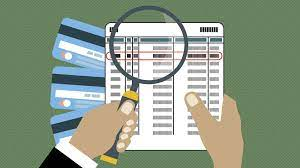

---
## 1. Acquisition de données
---

---
### 1.1 Importation de bliotèques et chargemengt de l'ensemble de données
---

- Importation des bibliothèques nécessaires à la manipulation des données à l'aide de Pandas.
- Lecture d'un fichier CSV nommé train_essays.csv contenant des données de dissertation.
- Sélection de colonnes spécifiques (« texte » et « généré ») à partir de l'ensemble de données.
- Renommer la colonne « généré » en « étiquette » pour plus de clarté lors d'une analyse ultérieure

In [ ]:
from pandas import read_csv


train_dataset = read_csv('../input/llm-detect-ai-generated-text/train_essays.csv')[['text', 'generated']].rename(columns={'generated' : 'label'})

---
### 1.2 PRÉPARATION DES JEUX DE DONNÉES

---

- Chargement d'ensembles de données à partir de diverses sources à l'aide de la bibliothèque Pandas.
- Sélection des colonnes pertinentes (« texte » et « étiquette ») à partir de tous les ensembles de données.
- Attribuer des étiquettes à certains ensembles de données pour indiquer leur origine ou leur nature.
- Combinaison et réinitialisation de l'index des ensembles de données pour plus de cohérence.
- Création d'un ensemble d'ensembles de données organisés pour une analyse ultérieure et une formation de modèle.

In [ ]:
curated_dataset = read_csv('../input/daigt-proper-train-dataset/train_drcat_01.csv')[['text', 'label']].reset_index(drop=True)
curated_dataset1 = read_csv('../input/daigt-proper-train-dataset/train_drcat_02.csv')[['text', 'label']].reset_index(drop=True)
curated_dataset2 = read_csv('../input/daigt-proper-train-dataset/train_drcat_03.csv')[['text', 'label']].reset_index(drop=True)
curated_dataset3 = read_csv('../input/daigt-proper-train-dataset/train_drcat_04.csv')[['text', 'label']].reset_index(drop=True)

curated_dataset4 = read_csv('../input/argugpt/machine-train.csv')[['text']].reset_index(drop=True).assign(label=1)
curated_dataset5 = read_csv('../input/argugpt/machine-test.csv')[['text']].reset_index(drop=True).assign(label=1)

curated_dataset6 = read_csv('../input/llm-generated-essays/ai_generated_train_essays.csv')[['text']].reset_index(drop=True).assign(label=1)
curated_dataset7 = read_csv('../input/llm-generated-essays/ai_generated_train_essays_gpt-4.csv')[['text']].reset_index(drop=True).assign(label=1)

curated_dataset9 = read_csv('/kaggle/input/daigt-external-dataset/daigt_external_dataset.csv')[['text']].reset_index(drop=True).assign(label=1)
curated_dataset10 = read_csv('/kaggle/input/daigt-data-llama-70b-and-falcon180b/llama_70b_v1.csv')[['generated_text']].rename(columns={'generated_text' : 'text'}).reset_index(drop=True).assign(label=1)

curated_dataset11 = read_csv('/kaggle/input/daigt-data-llama-70b-and-falcon180b/falcon_180b_v1.csv')[['generated_text']].rename(columns={'generated_text' : 'text'}).reset_index(drop=True).assign(label=1)

curated_dataset12 = read_csv('/kaggle/input/daigt-v2-train-dataset/train_v2_drcat_02.csv')[['text', 'label']].reset_index(drop=True)
curated_dataset13 = read_csv('/kaggle/input/hello-claude-1000-essays-from-anthropic/persuade15_claude_instant1.csv')[['essay_text']].rename(columns={'essay_text' : 'text'}).reset_index(drop=True).assign(label=1)
curated_dataset14 = read_csv('/kaggle/input/llm-generated-essay-using-palm-from-google-gen-ai/LLM_generated_essay_PaLM.csv')[['text', 'generated']].rename(columns={'generated' : 'label'})
curated_dataset15 = read_csv('/kaggle/input/llm-7-prompt-training-dataset/train_essays_RDizzl3_seven_v2.csv')[['text', 'label']].reset_index(drop=True)
curated_dataset16 = read_csv('/kaggle/input/llm-7-prompt-training-dataset/train_essays_RDizzl3_seven_v1.csv')[['text', 'label']].reset_index(drop=True)
curated_dataset17 = read_csv('/kaggle/input/llm-7-prompt-training-dataset/train_essays_7_prompts_v2.csv')[['text', 'label']].reset_index(drop=True)
curated_dataset18 = read_csv('/kaggle/input/llm-7-prompt-training-dataset/train_essays_7_prompts.csv')[['text', 'label']].reset_index(drop=True)


---
### 1.3 COMBINAISON D'ENSEMBLES DE DONNÉES
---

- Importation de la fonction concat depuis la bibliothèque Pandas.
- Concaténation (empilement verticalement) de plusieurs ensembles de données organisés.
- Création d'un train_dataset unifié qui intègre des données provenant de diverses origines.

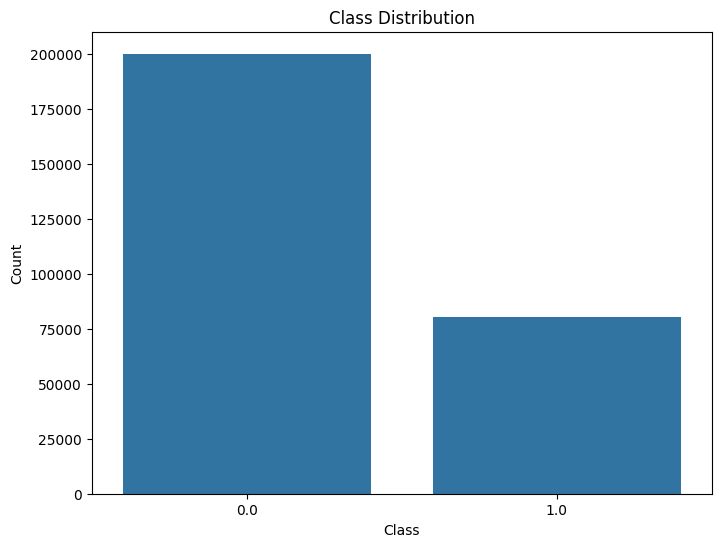

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import concat

train_dataset = concat([train_dataset,
                        curated_dataset,
                        curated_dataset1,
                        curated_dataset2,
                        curated_dataset3,
                        curated_dataset4,
                        curated_dataset5,
                        curated_dataset6,
                        curated_dataset7,
                        curated_dataset9,
                        curated_dataset10,
                        curated_dataset11,
                        curated_dataset12,
                        curated_dataset13,
                        curated_dataset14,
                        curated_dataset15,
                        curated_dataset16,
                        curated_dataset17,
                        curated_dataset18])


plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=train_dataset)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

---
## 2. PRÉTRAITEMENT DES DONNÉES
---

---
### 2.1 CLEANING
--- ( nettoyage )

- Accéder à la colonne « texte » dans le train_datasetDataFrame.
- Utilisation de la .str.replace('\n', ' ')méthode pour remplacer les caractères de nouvelle ligne ( '\n') par des espaces.
- Pour assurer l’uniformité et la cohérence des données textuelles.

In [ ]:
train_dataset.text = train_dataset.text.str.replace('\n', ' ')

---
### 2.2 EXAMEN DE L'ENSEMBLE DE DONNÉES
---

In [ ]:
train_dataset.head()

,text,label
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


---
### 2.3 VÉRIFICATION DE LA RÉPARTITION DES ÉTIQUETTES
---

---
- Utilisation de la méthode Pandas **`**value_counts()**`** sur la colonne « label ».
- Cette méthode compte les occurrences de chaque étiquette unique dans l'ensemble de données.
- La sortie fournit un résumé, indiquant combien d’instances appartiennent à chaque étiquette unique.
- Utile pour comprendre l'équilibre ou le déséquilibre de l'ensemble de données et pour prendre des décisions éclairées lors de la formation du modèle.
---

In [ ]:
train_dataset.label.value_counts()

label
0.0    200039
1.0     80432
Name: count, dtype: int64

---
###  2.4 VECTORISATION DES DONNÉES TEXTUELLES
---


- Importation de la couche TextVectorization depuis la bibliothèque Keras de TensorFlow.
- Initialisation d'un objet TextVectorization nommé tokenizer.
- Définition des paramètres du tokenizer :
      - `output_mode='int'`: Spécifie que la sortie du tokenizer sera codée en entier.
      - `output_sequence_length=512`: Définit la longueur fixe des séquences de sortie.
      - `standardize=None`: Désactivation de la normalisation pour conserver le texte original.
      - `ngrams=1`: Configuration de la tokenisation d'unigramme.
---

In [ ]:
from tensorflow.keras.layers import TextVectorization

tokenizer = TextVectorization(output_mode='int', output_sequence_length=512, standardize=None, ngrams=1)

---
### 2.5 ADAPTATION DE LA COUCHE DE VECTORISATION
---

---
- En utilisant la adaptméthode de la TextVectorizationcouche.
Passer la colonne « texte » de l’ensemble de données d’entraînement ( train_dataset.text) à la adaptméthode.
- La couche apprend des paramètres importants tels que le vocabulaire (jetons uniques) et leurs indices au cours de ce processus d'adaptation.
- L'adaptation du tokeniseur aux données de formation garantit la cohérence de la tokenisation et de la vectorisation lorsque le modèle est ultérieurement appliqué à de nouvelles données invisibles.
---

In [ ]:
tokenizer.adapt(train_dataset.text)

---
## 3. CONFIGURATION DU MODÈLE
---

---
### 3.1 DÉTERMINATION DE LA TAILLE DU VOCABULAIRE APPRIS
---

- Utiliser la méthode `get_vocabulary()` pour récupérer le vocabulaire appris par le tokenizer lors de la phase d'adaptation.
- Calculer la longueur du vocabulaire en appliquant la fonction `len()`.

In [ ]:
VOCAB_SIZE = len(tokenizer.get_vocabulary())
VOCAB_SIZE

203653

In [ ]:
# tokenizer(train_dataset.text[:1]).numpy().tolist()

---
### 3.2 DÉFINITION DE L'ARCHITECTURE DU MODÈLE POUR LE MÉCANISME DE RÉTENTION
---

1. Couche RecurrentRetention (RecurrentRetention) :
  - Implémente un mécanisme de rétention récurrent utilisant trois couches de rétroaction pour la requête (Q), la clé (K) et la valeur (V).
  - Les paramètres incluent input_size, Hidden_size, gamma et autres.
  - Applique une opération de rétention dans la méthode d'appel, produisant une sortie et un état mis à jour.
  

2. Couche FeedForward (FeedForward) :
  - Une simple couche de rétroaction utilisée dans le mécanisme de rétention.
  - Les paramètres incluent d_model, dff, dropout_rate et activation.
  

3. Couche de rétention (rétention) :
  - Implémente un mécanisme de rétention utilisant trois couches denses pour la requête (Q), la clé (K) et la valeur (V).
  - Applique le calcul de la décroissance, les astuces de normalisation et une transformation finale dans la méthode d'appel.
  

4. Couche MultiScaleRetention (MultiScaleRetention) :
  - Combine plusieurs têtes de rétention, chacune avec une valeur gamma différente.
  - Utilise la normalisation de groupe, le déclenchement pondéré et une transformation linéaire finale.
  

5. Couche RetentionEncoder (RetentionEncoder) :
  - Intègre les couches de normalisation des couches, de rétention multi-échelle et de rétroaction.
  - Définit la passe avant (méthode d'appel) pour l'encodeur de rétention.


6. Initialisation :
  - Le RetentionEncoder est initialisé avec des paramètres tels que dim (dimension), hdim (dimension de tête) et un retention_layer personnalisé.

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Layer, LayerNormalization, GroupNormalization, Dense, SimpleRNNCell, RNN, LSTM, Bidirectional, LSTMCell
import torch
from itertools import repeat

import tensorflow as tf
from tensorflow.keras.layers import Layer, LayerNormalization, Dense, SimpleRNNCell, RNN, LSTM, Bidirectional, LSTMCell

class RecurrentRetention(tf.compat.v1.nn.rnn_cell.RNNCell):
    def __init__(self,
                 input_size,
                 hidden_size=32,
                 gamma=0.984375,
                 trainable=True,
                 dtype=None,
                 **kwargs):
        super(RecurrentRetention, self).__init__(trainable=trainable,
                                        dtype=dtype,
                                        **kwargs)
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.r_layers = {
            'Q' : Dense(hidden_size),
            'K' : Dense(hidden_size),
            'V' : Dense(hidden_size)
        }

        self.gamma = tf.Variable(gamma, trainable=True)

    @property
    def state_size(self):
        return tf.TensorShape([self.hidden_size, self.hidden_size])

    @property
    def output_size(self):
        return self.hidden_size

    def call(self, inputs, state):
      q, k, v = [tf.cast(f(inputs), tf.float32) for f in self.r_layers.values()]
      s = self.gamma*state + tf.linalg.matmul(k, v, transpose_a=True)#tf.transpose(k, perm=[1, 0])@v
      x = tf.einsum('bi, bzk -> bk', q, s)
      return x, s


class FeedForward(tf.keras.layers.Layer):
  def __init__(self, d_model, dff, dropout_rate=0.3, activation='gelu'):
    super().__init__()
    self.seq = tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation=activation),
      tf.keras.layers.Dense(d_model),
      tf.keras.layers.Dropout(dropout_rate)
    ])

  def call(self, x):
    return self.seq(x)


class Retention(Layer):
    def __init__(self, dim=128, gamma = 0.9865, **kwargs):
        super().__init__()
        _dense_kwargs = {
                "use_bias" : True,
                "dtype" : "float32"
                }
        self._qkv_layers = [Dense(dim, **_dense_kwargs),
                            Dense(dim, **_dense_kwargs),
                            Dense(dim, **_dense_kwargs)]
        self.gamma = gamma

    def call(self, x, training=False):
        Q, K, V = [f(z) for f, z in zip(self._qkv_layers, x)]
        _, s, d = Q.shape
        #b = b if b is not None else 1
        x = Q@tf.transpose(K, perm=[0, 2, 1])
        x /= d**0.5 #Normalization Trick 1
        D = self._compute_decay(s, self.gamma)
        D /= tf.reduce_sum(D, -1)**0.5 #Normalization Trick 2
        #D = tf.stack([*repeat(D, b)])
        x = x*D
        _norm_3 = lambda xs: xs/tf.maximum(tf.abs(tf.math.reduce_sum(xs, -1)), 1)
        x = tf.vectorized_map(_norm_3, x) #Normalization Trick 3
        x = x@V
        return x

    def _compute_decay(self, seq_len, gamma = 0.96875):
        _indices = list(range(0, seq_len))
        _decay_factors = [gamma**(i-j) if i>=j else 0 for i in _indices for j in _indices]
        D = tf.reshape(tf.convert_to_tensor(_decay_factors, dtype='float32'), (seq_len, seq_len))
        #mask = tf.eye(seq_len, dtype=tf.float32)
        #mask += tf.roll(mask, shift=-1, axis=-1)+tf.roll(mask, shift=-2, axis=-1)
        return D#*mask

class MultiScaleRetention(Layer):
    def __init__(self, dim, hdim=100, retention_layer=Retention, **kwargs):
      super(MultiScaleRetention, self).__init__()
      gamma = 1 - (2 ** (-5 - torch.arange(0, dim//hdim).float()))
      gamma = gamma.numpy().tolist()
      self.dim = dim
      self.hdim = hdim
      self.heads = [retention_layer(dim=hdim, gamma=gamma[head], **kwargs) for head in range(dim // hdim)]#
      self.gn = GroupNormalization(dim)#//hdim, scale=False)
      self.wg = Sequential([
            Dense(dim, use_bias=True, activation = 'swish', **kwargs),
        ])
      self.wo = Dense(dim, use_bias=True, **kwargs)

    def call(self, q, k, v):
      W = self.wg(q)
      #q, k, v = list(map(lambda val: tf.split(val, self.dim//self.hdim, 2), x))
      x = [headi([q, k, v]) for headi in self.heads]
      x = tf.concat(x, -1)
      Y = self.gn(x)
      x = self.wo(W * Y)
      return x

class RetentionEncoder(Layer):
    def __init__(self, dim=540, hdim=100, retention_layer=Retention, **kwargs):
        super().__init__()
        self.layer_norm = LayerNormalization()
        self.msr = MultiScaleRetention(dim, hdim, retention_layer=retention_layer)
        self.layer_norm1 = LayerNormalization()
        self.ffn = FeedForward(dim, dim*4)

    def call(self, x, training=False):
      xn = self.layer_norm(x)
      msr_x = self.msr(xn, xn, xn) + x
      x = self.ffn(self.layer_norm1(msr_x)) + msr_x
      return x

---
### 3.3 INITIALISER UNE STRATÉGIE EN MIROIR
---

- Création d'une instance de '*MirroredStrategy*' nommée '*strategy*'.
- MirroredStrategy est conçu pour la formation synchrone sur plusieurs GPU en répliquant toutes les variables et calculs du modèle sur chaque GPU disponible.

In [ ]:
strategy = tf.distribute.MirroredStrategy()

---
### 3.4 CONFIGURATION DU MODÈLE
---

- Création d'un modèle d'emballage pour utiliser la MirroredStrategy précédemment - définie pour la formation distribuée.
- Définir la couche d'entrée avec une forme de (512,).
- Application d'une couche d'intégration pour convertir les jetons d'entrée en vecteurs denses.
- Utilisation d'une couche séquentielle avec RetentionEncoder répétée une fois pour l'extraction de fonctionnalités.
- Application d'une couche d'abandon pour introduire la régularisation et éviter le surajustement.
- Aplatir la sortie pour les couches denses suivantes.
- Ajout d'une couche dense avec une activation sigmoïde pour la classification binaire.
- Création du modèle final en spécifiant les couches d'entrée et de sortie.
- Compilation du modèle avec un optimiseur Adam, une perte de crossentropie focale binaire et plusieurs métriques d'évaluation.

In [ ]:
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, Softmax, Dropout
from itertools import repeat

with strategy.scope():
    inputs = Input((512, ))
    x = Embedding(len(tokenizer.get_vocabulary()), 32)(inputs)
    x = Sequential([*repeat(RetentionEncoder(32, 32//2), 1)])(x)#RNN(RecurrentRetention(32, 32))(x)
    z = Dropout(0.5)(x)
    x = Flatten()(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=x)

    model.compile(
              optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4, weight_decay=0.1, clipvalue=3),
              loss=tf.keras.losses.BinaryFocalCrossentropy(apply_class_balancing=True, label_smoothing=0.1),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      tf.keras.metrics.AUC(),
                      tf.keras.metrics.Recall(),
                      tf.keras.metrics.Precision()],
          )

---
## 4. FORMATION DE MODÈLE
---

---
### 4.1 MODÈLE DE FORMATION SUR PLUSIEURS GPU
---

- Création d'un ensemble de données TensorFlow à partir des données d'entrée, tokenisation du texte et traitement par lots avec des étiquettes.
- Mélanger l'ensemble de données pour introduire du caractère aléatoire dans la formation de chaque époque.
- Diviser l'ensemble de données en ensembles de formation (train_split) et de validation (val_split).
- Utiliser la méthode model.fit pour entraîner le modèle sur l'ensemble d'entraînement (train_split), valider sur l'ensemble de validation (val_split) et spécifier le nombre d'époques et la taille du lot.
- L'historique de formation est collecté dans la liste des historiques.

In [ ]:
histories = []
with strategy.scope():
    ds = tf.data.Dataset.from_tensor_slices((train_dataset.text, train_dataset.label)).batch(128).map(lambda x, y: (tokenizer(x), y))
    ds = ds.shuffle(ds.cardinality())
    train_split = ds.take(int(len(ds)*0.8))
    val_split = ds.skip(int(len(ds)*0.8)).take(int(len(ds)*0.2))
    histories = model.fit(train_split, validation_data=[val_split], epochs=1, batch_size=128)

1753/1753 [==============================] - 6564s 4s/step - loss: 0.0152 - binary_accuracy: 0.9648 - auc: 0.9861 - recall: 0.9102 - precision: 0.9657 - val_loss: 0.0074 - val_binary_accuracy: 0.9822 - val_auc: 0.9979 - val_recall: 0.9398 - val_precision: 0.9975


---
### 4.2 LECTURE DES DONNÉES
---

- Reading the CSV file located at '../input/llm-detect-ai-generated-text/test_essays.csv'.

In [ ]:
test = read_csv('../input/llm-detect-ai-generated-text/test_essays.csv', sep=',')

---
## 5. INFÉRENCE DU MODÈLE
---

### 5.1 UTILISER UN MODÈLE FORMÉ POUR FAIRE DES PRÉVISIONS

- Encapsuler le processus de prédiction dans Strategy.scope() pour tirer parti de la stratégie de formation distribuée spécifiée.
- Création d'un jeu de données TensorFlow à partir des données de test (test.text).
- Regrouper et tokeniser les données texte à l'aide du tokenizer du modèle.
- Utiliser la méthode model.predict pour obtenir des prédictions pour les données de test.
- La variable générée résultante contient les prédictions du modèle pour une analyse ou une évaluation plus approfondie.

In [ ]:
with strategy.scope():
    generated = model.predict(tf.data.Dataset.from_tensor_slices((test.text)).batch(128).map(lambda x: tokenizer(x)))

1/1 [==============================] - 10s 10s/step


---
## 6.TRAITEMENT POST-INFÉRENCE
---

---
### 6.1 STOCKAGE DES PRÉVISIONS
---

- Les valeurs de la colonne "générées" sont remplies avec les prédictions obtenues à partir du modèle.

In [ ]:
test['generated'] = generated

---
### 6.2 MODIFICATION DU DATAFRAME DE TEST
---

- Les colonnes 'prompt_id' et 'text' sont supprimées du DataFrame.
- L'index du DataFrame est réinitialisé après la suppression des colonnes.

In [ ]:
test = test.drop(['prompt_id', 'text'], axis=1).reset_index(drop=True)

---
### 6.2 REGARDER L'ENSEMBLE DE DONNÉES
---

In [ ]:
test.head()

,id,generated
0,0000aaaa,0.854861
1,1111bbbb,0.854861
2,2222cccc,0.854861


---
## 7. SOUMISSION
---

In [ ]:
test.to_csv('submission.csv', index=False)